In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/kpk-crime-statistics-district.csv")

In [ ]:
# Print the names of columns
print(data.columns)

Index(['year', 'province', 'division', 'district', 'crime type', 'cases',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')


In [ ]:
# Define the columns to remove
columns_to_remove = ['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']

# Remove the columns from the DataFrame
data = data.drop(columns=columns_to_remove)

# Print the column names
print(data.columns)

Index(['year', 'province', 'division', 'district', 'crime type', 'cases'], dtype='object')


In [ ]:
unique_crime_types = data['crime type'].unique()
print(unique_crime_types)

['Murder' 'Kids:Ransom' 'Child Lifting' 'Abduction' 'Car Theft'
 'Car Snatching' 'M.Cycle Theft']


In [ ]:
print(data.head())
print(data.describe())
print(data.info())

   year province division    district     crime type  cases  Unnamed: 6  \
0  2011      KPK  Hazara   Abbottabad         Murder     76         NaN   
1  2011      KPK  Hazara   Abbottabad    Kids:Ransom      0         NaN   
2  2011      KPK  Hazara   Abbottabad  Child Lifting      3         NaN   
3  2011      KPK  Hazara   Abbottabad      Abduction    127         NaN   
4  2011      KPK  Hazara   Abbottabad      Car Theft      5         NaN   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  
0         NaN         NaN         NaN          NaN          NaN  
1         NaN         NaN         NaN          NaN          NaN  
2         NaN         NaN         NaN          NaN          NaN  
3         NaN         NaN         NaN          NaN          NaN  
4         NaN         NaN         NaN          NaN          NaN  
              year       cases  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
count   875.000000  875.000000         0.0         0.0         0.0   
mean   2013.0

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
data = data.fillna(0)  # Replace missing values with 0 or use other strategies

year             0
province         0
division         0
district         0
crime type       0
cases            0
Unnamed: 6     875
Unnamed: 7     875
Unnamed: 8     875
Unnamed: 9     875
Unnamed: 10    875
Unnamed: 11    875
dtype: int64


**bold text**## Ratio of Crime type and its occurence in KPK from 2011 to 2015

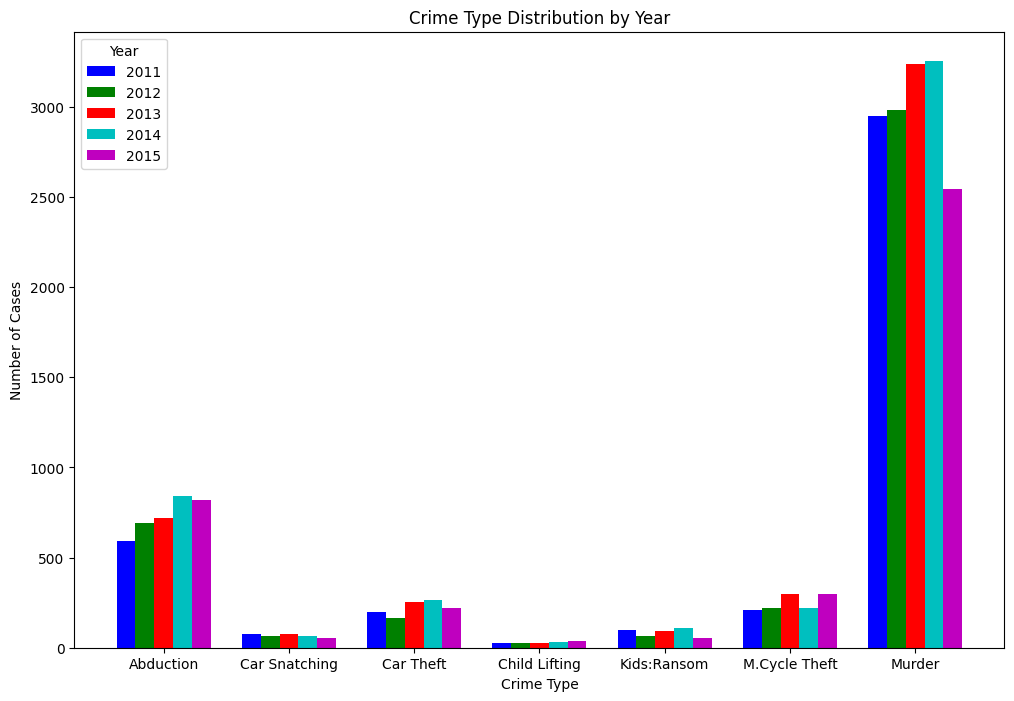

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

unique_years = crime_type_year_cases['year'].unique()
num_crime_types = len(crime_type_year_cases['crime type'].unique())

# Set the width of the bars
bar_width = 0.15

# Set the positions of the x-axis ticks
ind = np.arange(num_crime_types)

# Set the colors for each year
colors = ['b', 'g', 'r', 'c', 'm']

# Create the grouped bar chart
plt.figure(figsize=(12, 8))

# Iterate over each unique year
for i, year in enumerate(unique_years):
    year_data = crime_type_year_cases[crime_type_year_cases['year'] == year]

    # Calculate the positions for the bars
    x_pos = ind + (i * bar_width)

    # Create the bars for the current year
    plt.bar(x_pos, year_data['cases'], width=bar_width, label=str(year), color=colors[i])

# Set the x-axis labels
plt.xticks(ind + (bar_width * (len(unique_years) - 1)) / 2, crime_type_year_cases['crime type'].unique())

plt.xlabel('Crime Type')
plt.ylabel('Number of Cases')
plt.title('Crime Type Distribution by Year')
plt.legend(title='Year')
plt.show()

# Number fo cases in each Division of KPK from 2011-15

<ipython-input-58-e95cca377ef9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['division', 'year']).sum().reset_index()


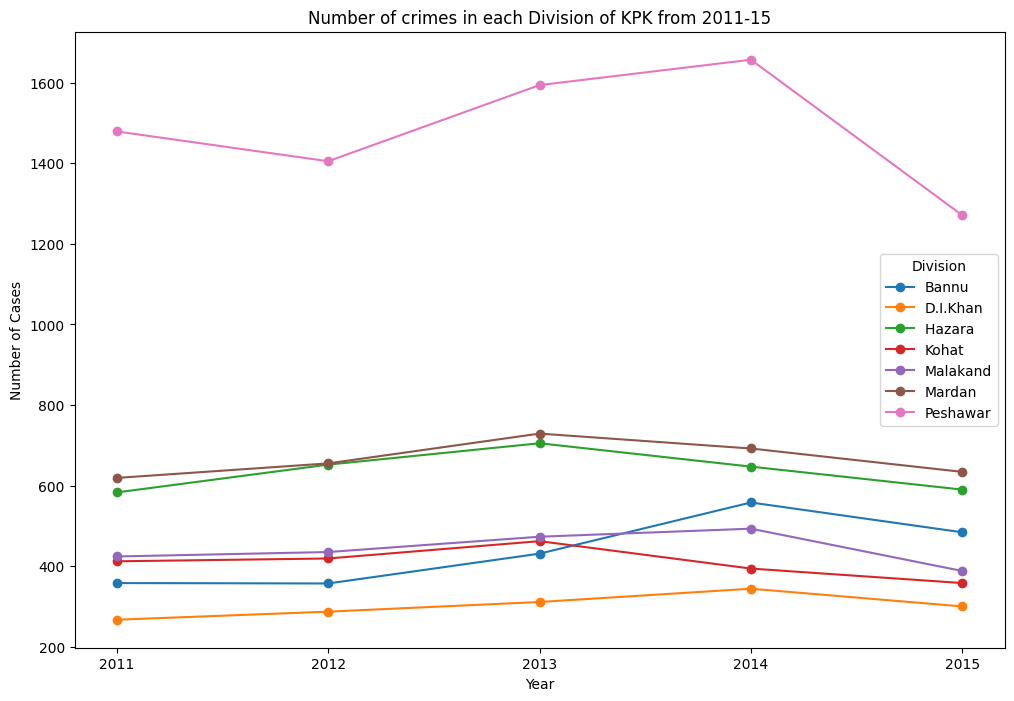

In [ ]:
import matplotlib.pyplot as plt

# Group the data by division and year
grouped_data = data.groupby(['division', 'year']).sum().reset_index()

# Get the unique divisions and years
divisions = grouped_data['division'].unique()
years = grouped_data['year'].unique()

# Check if data is available for plotting
if len(divisions) == 0 or len(years) == 0:
    print("No data available for plotting.")
    exit()

# Set up the line chart
plt.figure(figsize=(12, 8))

# Iterate over each division
for division in divisions:
    division_data = grouped_data[grouped_data['division'] == division]

    # Plot the line chart for each division
    plt.plot(division_data['year'], division_data['cases'], marker='o', label=division)

# Set the x-axis labels
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Number of crimes in each Division of KPK from 2011-15')
plt.legend(title='Division')
plt.show()

# Crime type and its occurence in different Divisions of KPK from 2011-15

<ipython-input-67-387904605173>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['division', 'year', 'crime type']).sum().reset_index()
<ipython-input-67-387904605173>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


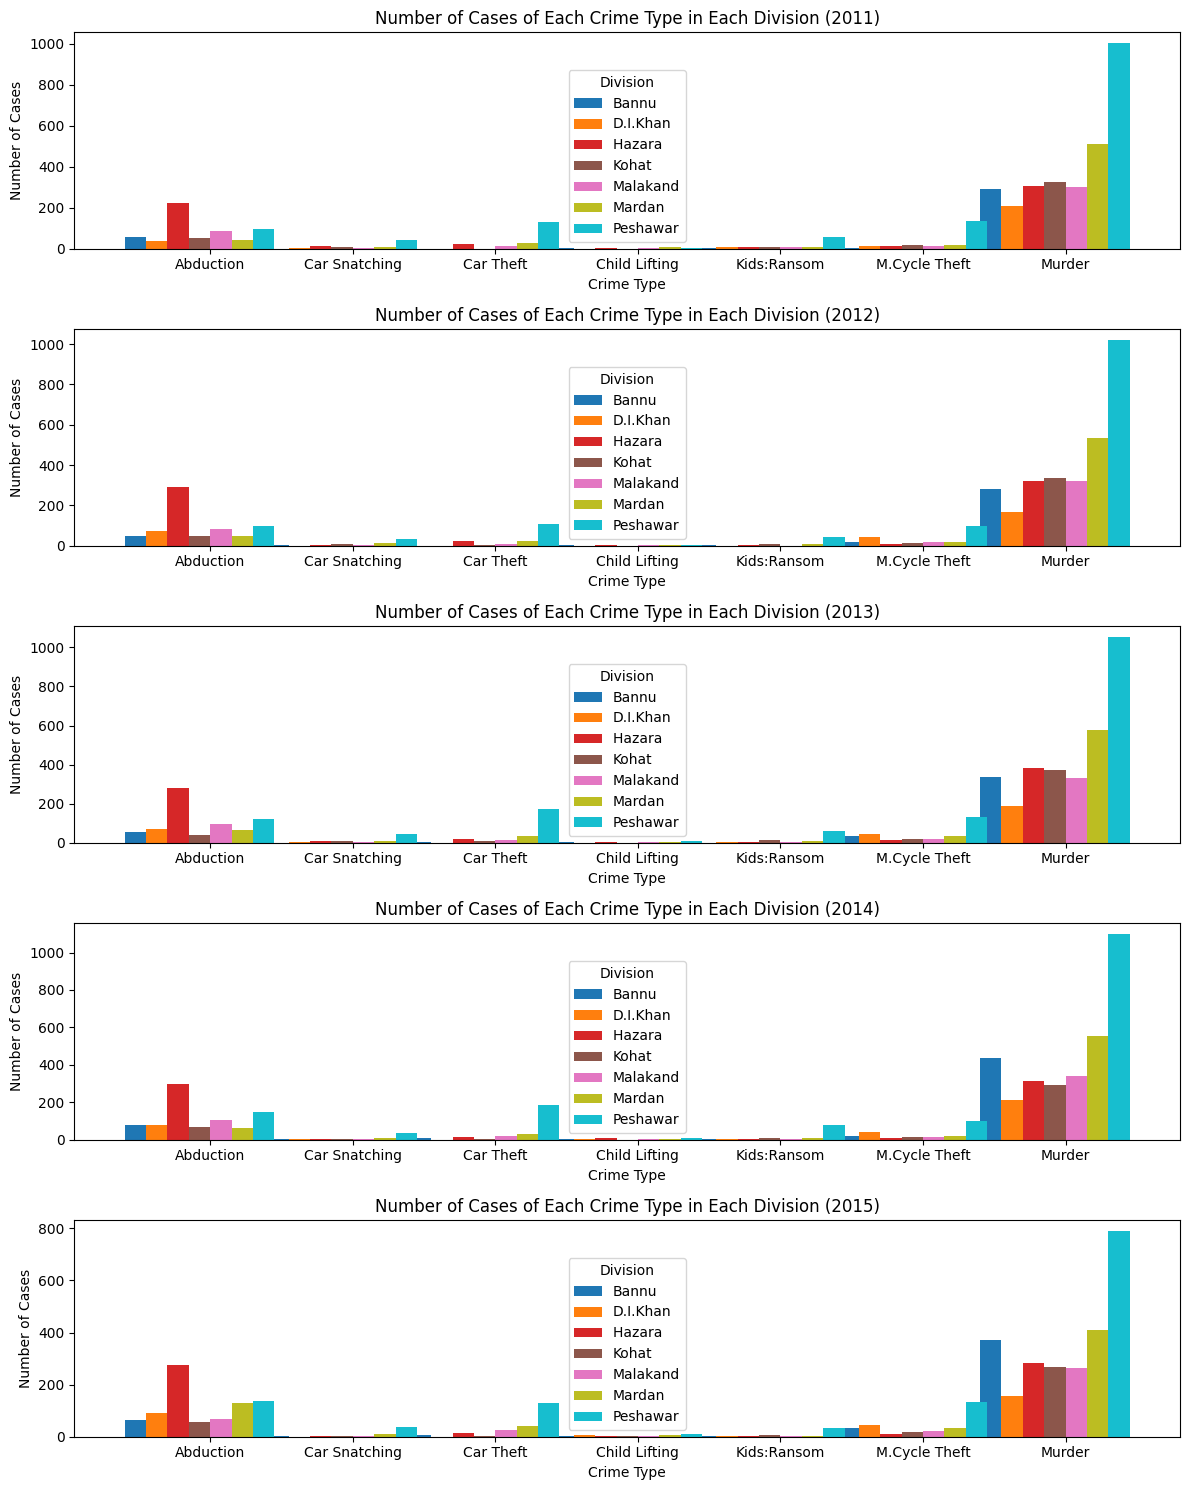

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by division, year, and crime type
grouped_data = data.groupby(['division', 'year', 'crime type']).sum().reset_index()

# Get the unique divisions, years, and crime types
divisions = grouped_data['division'].unique()
years = grouped_data['year'].unique()
crime_types = grouped_data['crime type'].unique()

# Set up the grouped bar charts for each year
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 15))

# Set the positions of the bars
bar_width = 0.15
pos = np.arange(len(crime_types))

# Set up the colormap
colormap = plt.cm.get_cmap('tab10')
colors = [colormap(i) for i in np.linspace(0, 1, len(divisions))]

# Iterate over each year
for i, year in enumerate(years):
    ax = axes[i]

    # Iterate over each division
    for j, division in enumerate(divisions):
        division_data = grouped_data[(grouped_data['division'] == division) & (grouped_data['year'] == year)]

        # Initialize the heights for each crime type
        heights = [0] * len(crime_types)

        # Calculate the heights for each crime type in the division and year
        for _, row in division_data.iterrows():
            crime_type = row['crime type']
            cases = row['cases']

            index = np.where(crime_types == crime_type)[0][0]
            heights[index] = cases

        # Plot the bars for each division in the current year
        ax.bar(pos + (j * bar_width), heights, bar_width, label=division, color=colors[j])

    # Set the x-axis labels and title for each year
    ax.set_xlabel('Crime Type')
    ax.set_ylabel('Number of Cases')
    ax.set_title(f'Number of Cases of Each Crime Type in Each Division ({year})')
    ax.set_xticks(pos + (len(divisions) * bar_width) / 2)
    ax.set_xticklabels(crime_types)
    ax.legend(title='Division')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()

# Districts with highest number of crime-type in KPK

<ipython-input-69-b6f3f7f92c3e>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['year', 'crime type', 'district']).sum().reset_index()


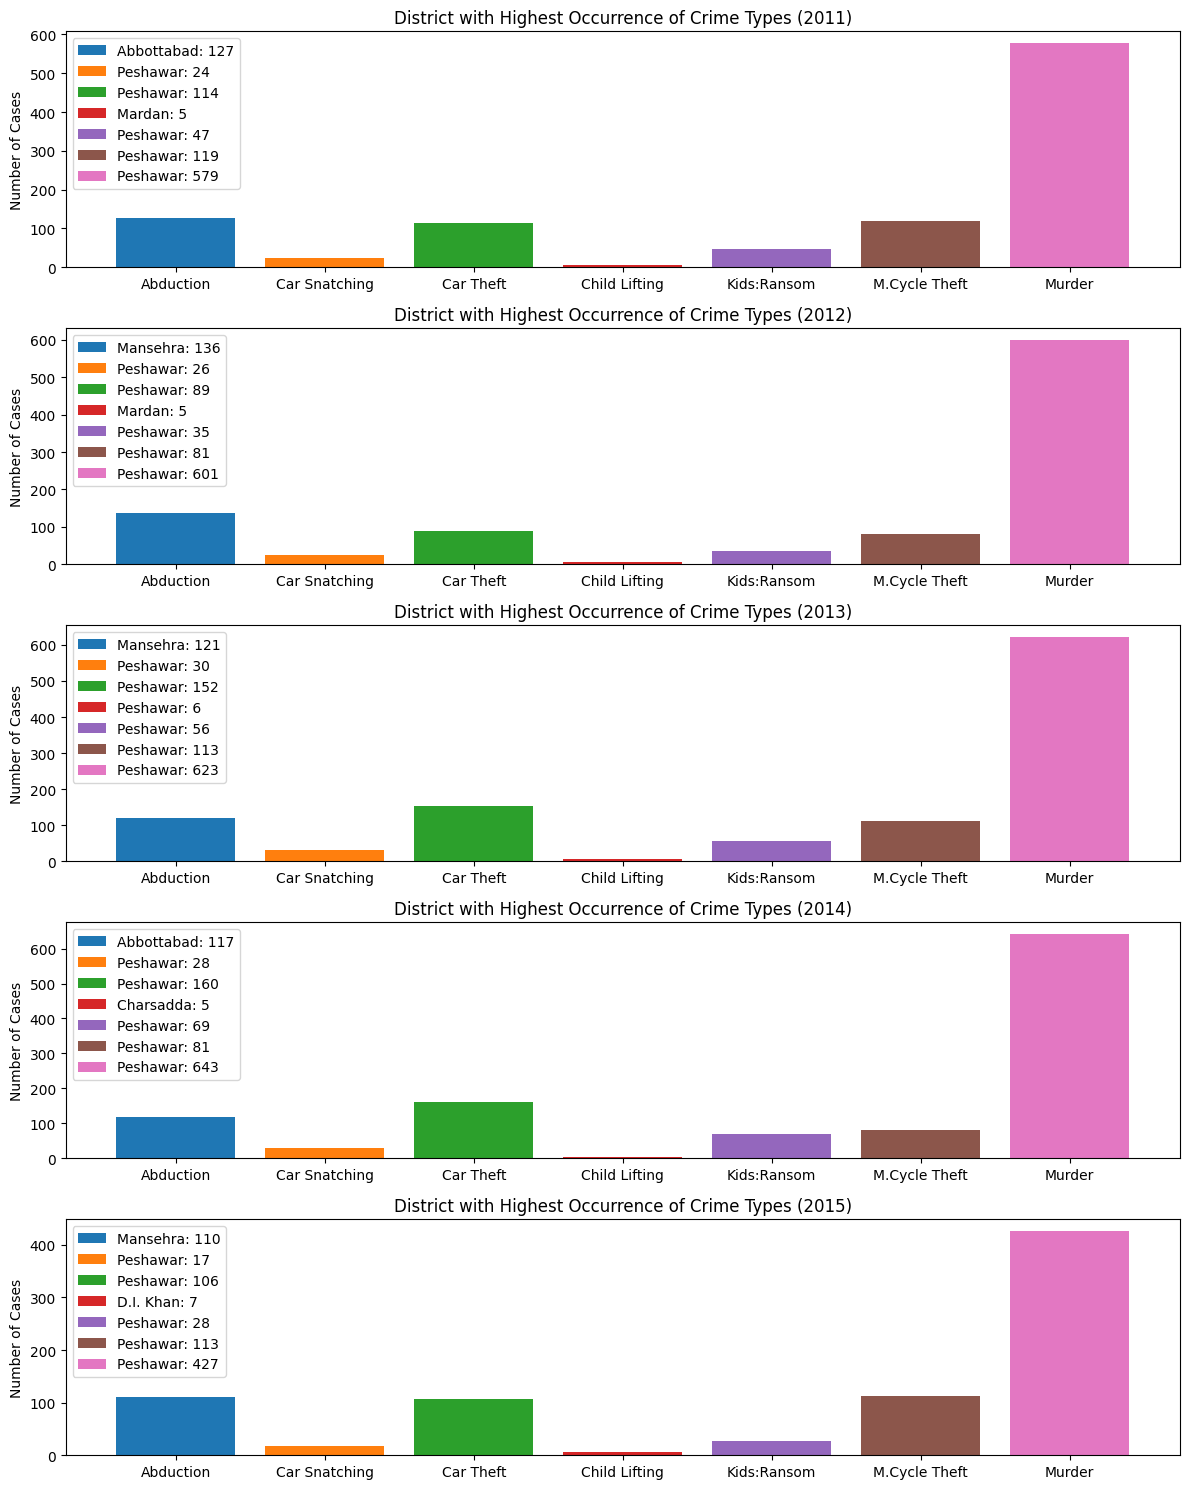

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by year, crime type, and district
grouped_data = data.groupby(['year', 'crime type', 'district']).sum().reset_index()

# Get the unique years and crime types
years = grouped_data['year'].unique()
crime_types = grouped_data['crime type'].unique()

# Set up the bar charts for each year
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 15))

# Iterate over each year
for i, year in enumerate(years):
    ax = axes[i]

    # Iterate over each crime type
    for j, crime_type in enumerate(crime_types):
        crime_data = grouped_data[(grouped_data['year'] == year) & (grouped_data['crime type'] == crime_type)]

        # Find the district with the highest occurrence for the current crime type and year
        max_cases = crime_data['cases'].max()
        max_district = crime_data.loc[crime_data['cases'] == max_cases, 'district'].values[0]

        # Plot the bar for the district with the highest occurrence and include the district name
        ax.bar(crime_type, max_cases, label=f'{max_district}: {max_cases}')

    # Set the y-axis label and title for each year
    ax.set_ylabel('Number of Cases')
    ax.set_title(f'District with Highest Occurrence of Crime Types ({year})')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()

In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Display the data types of each column
print(data.dtypes)

   year province division    district     crime type  cases
0  2011      KPK  Hazara   Abbottabad         Murder     76
1  2011      KPK  Hazara   Abbottabad    Kids:Ransom      0
2  2011      KPK  Hazara   Abbottabad  Child Lifting      3
3  2011      KPK  Hazara   Abbottabad      Abduction    127
4  2011      KPK  Hazara   Abbottabad      Car Theft      5
year          category
province      category
division      category
district      category
crime type    category
cases            int64
dtype: object


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/kpk-crime-statistics-district.csv')

# Convert the 'cases' column to boolean values
data['cases'] = data['cases'] > 0

# Group the data by transaction identifier (year, province, division, district)
transactions = data.groupby(['year', 'province', 'division', 'district'])['crime type'].apply(list).reset_index()

# Convert the transaction data into a list of lists format
transaction_list = transactions['crime type'].tolist()

# Apply one-hot encoding to convert the transaction data into a binary matrix
te = TransactionEncoder()
transaction_matrix = te.fit_transform(transaction_list)
df = pd.DataFrame(transaction_matrix, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the association rules
print(rules)

          antecedents                                        consequents  \
0         (Abduction)                                    (Car Snatching)   
1     (Car Snatching)                                        (Abduction)   
2         (Car Theft)                                        (Abduction)   
3         (Abduction)                                        (Car Theft)   
4         (Abduction)                                    (Child Lifting)   
...               ...                                                ...   
1927    (Kids:Ransom)  (M.Cycle Theft, Abduction, Car Snatching, Car ...   
1928  (Car Snatching)  (M.Cycle Theft, Abduction, Kids:Ransom, Car Th...   
1929      (Car Theft)  (M.Cycle Theft, Abduction, Kids:Ransom, Car Sn...   
1930         (Murder)  (M.Cycle Theft, Abduction, Kids:Ransom, Car Sn...   
1931  (Child Lifting)  (M.Cycle Theft, Abduction, Kids:Ransom, Car Sn...   

      antecedent support  consequent support  support  confidence  lift  \
0           

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/kpk-crime-statistics-district.csv')

# Convert the 'cases' column to boolean values
data['cases'] = data['cases'] > 0

# Group the data by transaction identifier (year, province, division, district)
transactions = data.groupby(['year', 'province', 'division', 'district'])['crime type'].apply(list).reset_index()

# Convert the transaction data into a list of lists format
transaction_list = transactions['crime type'].tolist()

# Apply one-hot encoding to convert the transaction data into a binary matrix
te = TransactionEncoder()
transaction_matrix = te.fit_transform(transaction_list)
df = pd.DataFrame(transaction_matrix, columns=te.columns_)

# Apply Apriori algorithm with adjusted parameters
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Generate association rules with adjusted parameters
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Print the association rules
print(rules)

          antecedents                                        consequents  \
0         (Abduction)                                    (Car Snatching)   
1     (Car Snatching)                                        (Abduction)   
2         (Car Theft)                                        (Abduction)   
3         (Abduction)                                        (Car Theft)   
4         (Abduction)                                    (Child Lifting)   
...               ...                                                ...   
1927    (Kids:Ransom)  (M.Cycle Theft, Abduction, Car Snatching, Car ...   
1928  (Car Snatching)  (M.Cycle Theft, Abduction, Kids:Ransom, Car Th...   
1929      (Car Theft)  (M.Cycle Theft, Abduction, Kids:Ransom, Car Sn...   
1930         (Murder)  (M.Cycle Theft, Abduction, Kids:Ransom, Car Sn...   
1931  (Child Lifting)  (M.Cycle Theft, Abduction, Kids:Ransom, Car Sn...   

      antecedent support  consequent support  support  confidence  lift  \
0           